<a href="https://colab.research.google.com/github/aryan98795/Edu_learn/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib scikit-learn seaborn --quiet

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

sns.set(style="whitegrid")


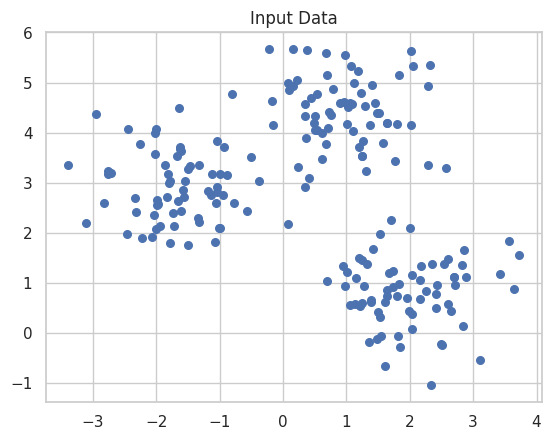

In [2]:
X, y_true = make_blobs(n_samples=200, centers=3, cluster_std=0.70, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Input Data")
plt.show()


In [3]:
def euclidean(a, b):
    return np.linalg.norm(a - b)

def initialize_centroids(X, k):
    np.random.seed(0)
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    labels = []
    for point in X:
        distances = [euclidean(point, c) for c in centroids]
        labels.append(np.argmin(distances))
    return np.array(labels)

def update_centroids(X, labels, k):
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        new_centroids[i] = X[labels == i].mean(axis=0)
    return new_centroids

def manual_kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids


Manual K-means

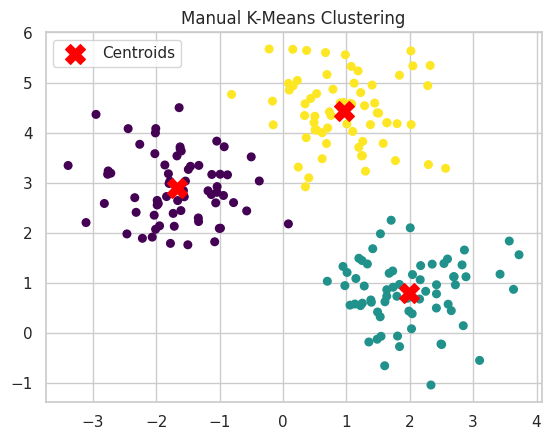

In [4]:
k = 3
manual_labels, manual_centroids = manual_kmeans(X, k)

plt.scatter(X[:, 0], X[:, 1], c=manual_labels, cmap='viridis', s=30)
plt.scatter(manual_centroids[:, 0], manual_centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("Manual K-Means Clustering")
plt.legend()
plt.show()


inbuilt-K-means

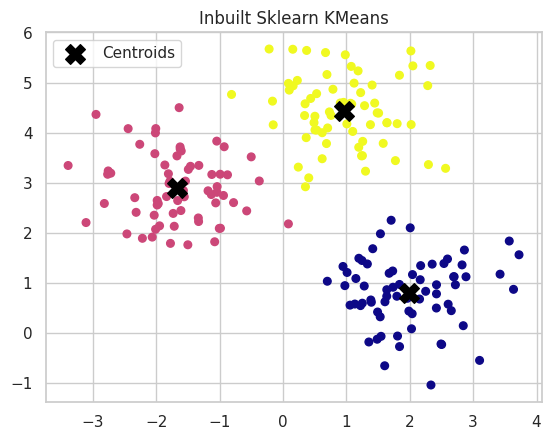

In [5]:
kmeans = KMeans(n_clusters=3, random_state=0)
inbuilt_labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=inbuilt_labels, cmap='plasma', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.title("Inbuilt Sklearn KMeans")
plt.legend()
plt.show()


Comparison of both results

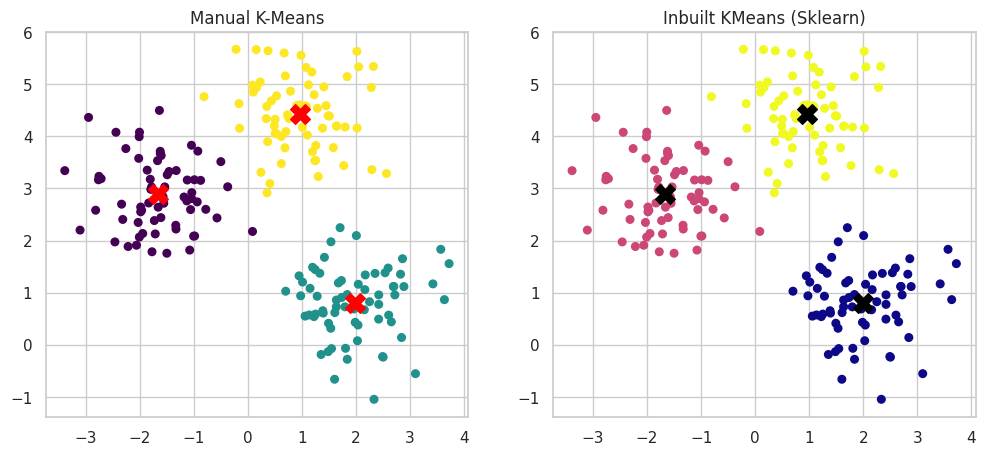

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(X[:, 0], X[:, 1], c=manual_labels, cmap='viridis', s=30)
axs[0].scatter(manual_centroids[:, 0], manual_centroids[:, 1], c='red', marker='X', s=200)
axs[0].set_title("Manual K-Means")

axs[1].scatter(X[:, 0], X[:, 1], c=inbuilt_labels, cmap='plasma', s=30)
axs[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='X', s=200)
axs[1].set_title("Inbuilt KMeans (Sklearn)")

plt.show()
